### Interested in representation of conf, pref, or both during trial periods in different regions: 

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools
from matplotlib.colors import LogNorm, Normalize


In [3]:
subject = "SA"
region_level = "structure_level2"
regions = ["inferior_temporal_cortex (ITC)", "medial_pallium (MPal)", "basal_ganglia (BG)", "amygdala (Amy)"]

In [20]:
args = argparse.Namespace(
    **AnovaConfigs()._asdict()
)
args.conditions = ["BeliefConf", "BeliefPartition"]
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.window_size = 500
args.subject = subject
args.trial_event = "FeedbackOnsetLong"
pref_res = io_utils.read_anova_good_units(args, "95th", "BeliefPref", read_shuffle=True)
conf_res = io_utils.read_anova_good_units(args, "95th", "BeliefConf", read_shuffle=True)

merged = pd.merge(pref_res, conf_res, on=["PseudoUnitID", "WindowEndMilli", "feat", "structure_level2"], how="outer", indicator=True)
merged = merged.rename(columns={'_merge': 'pop_type'})
merged["pop_type"] = merged["pop_type"].map({"left_only": "pref_only", "right_only": "conf_only", "both": "both"})
# just_pref_res = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
# just_conf_res = merged[merged['_merge'] == 'right_only'].drop(columns=['_merge'])
# both = merged[merged['_merge'] == 'both'].drop(columns=['_merge'])



In [21]:
# res = pd.merge(pref_res, conf_res, on=["PseudoUnitID", "abs_time", "feat", "structure_level2"])
# res = pd.merge(pref_res, conf_res, on=["PseudoUnitID", "WindowEndMilli", "feat", "structure_level2"])


<Axes: xlabel='WindowEndMilli', ylabel='PseudoUnitID'>

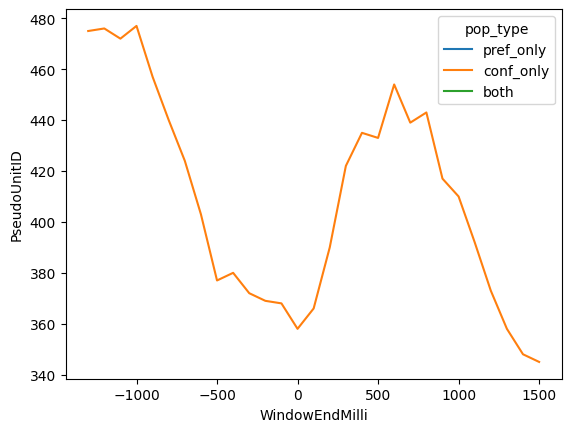

In [26]:
# by_time = res.groupby(["WindowEndMilli", "structure_level2"]).PseudoUnitID.nunique().reset_index()
# both_by_time = both.groupby(["WindowEndMilli"]).PseudoUnitID.nunique().reset_index()
num_units = merged.groupby(["WindowEndMilli", "pop_type"]).PseudoUnitID.nunique().reset_index()
num_units = num_units[num_units.pop_type == "conf_only"]
sns.lineplot(num_units, x="WindowEndMilli", y="PseudoUnitID", hue="pop_type")

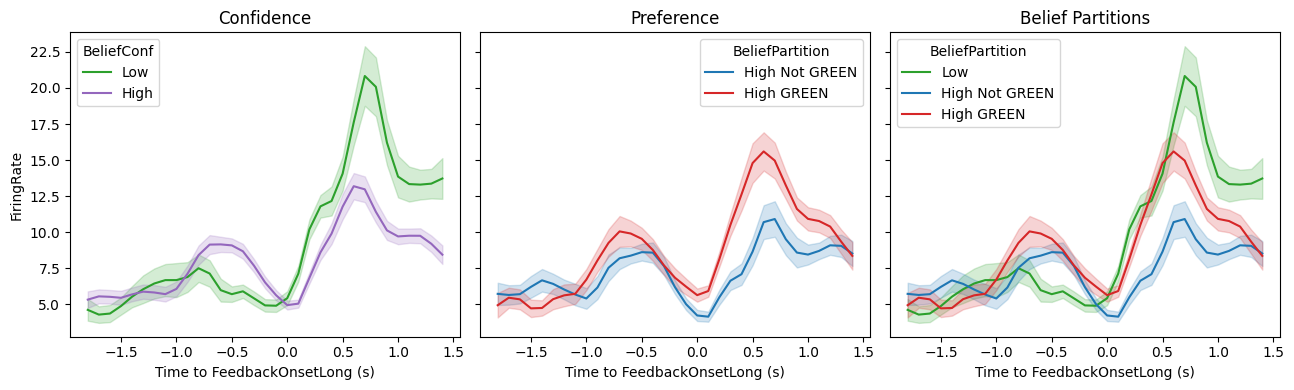

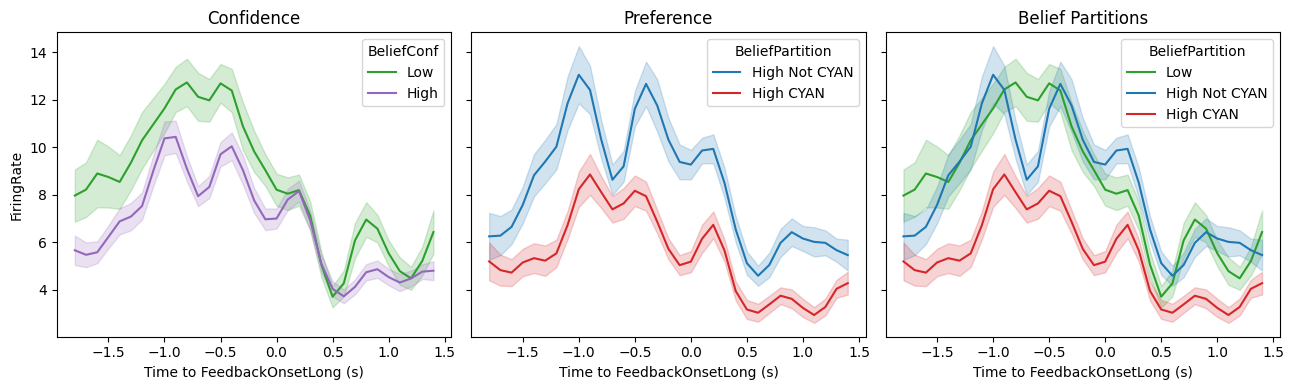

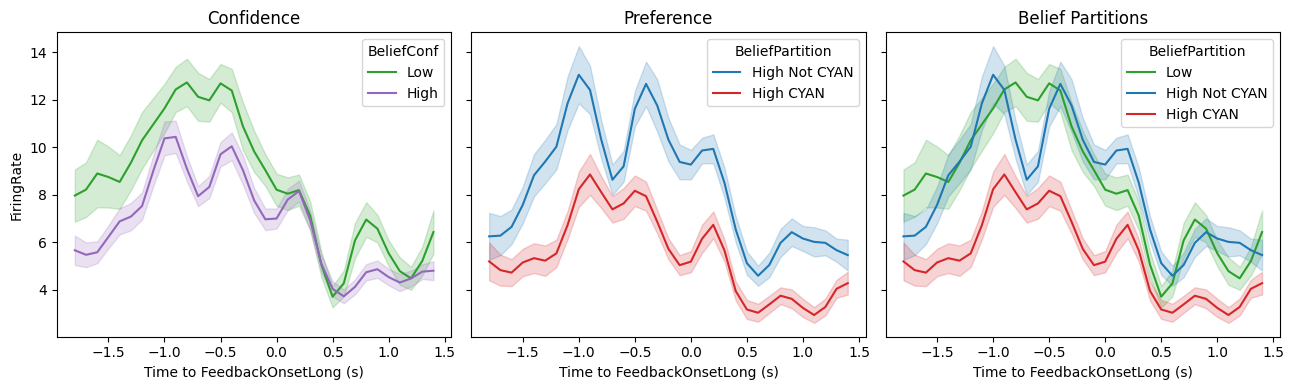

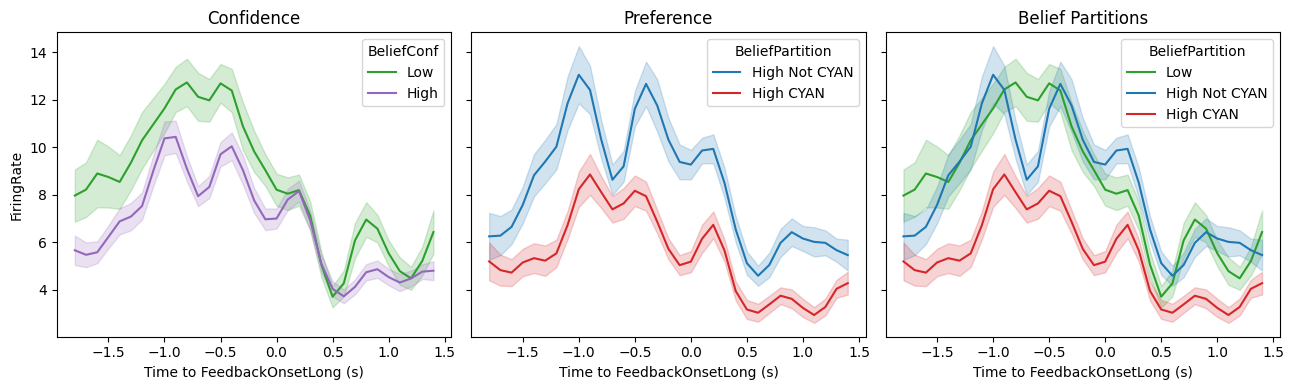

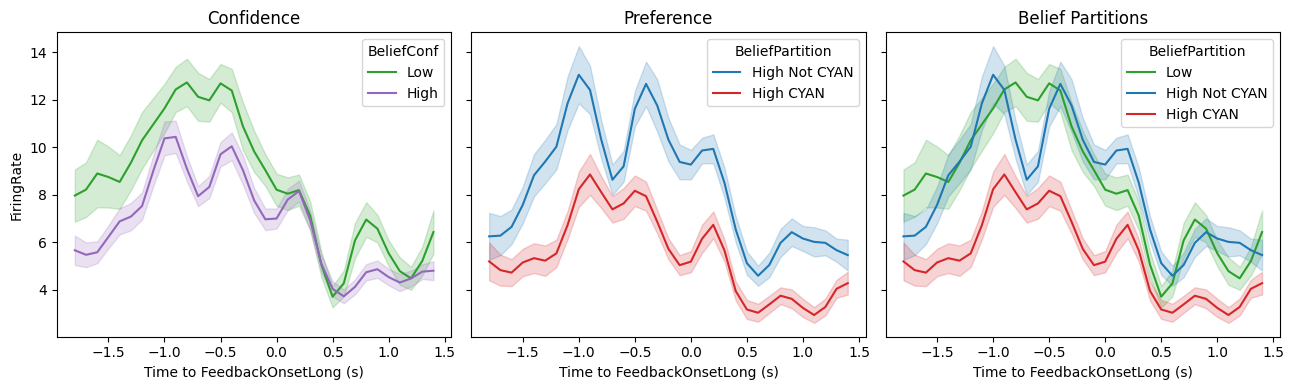

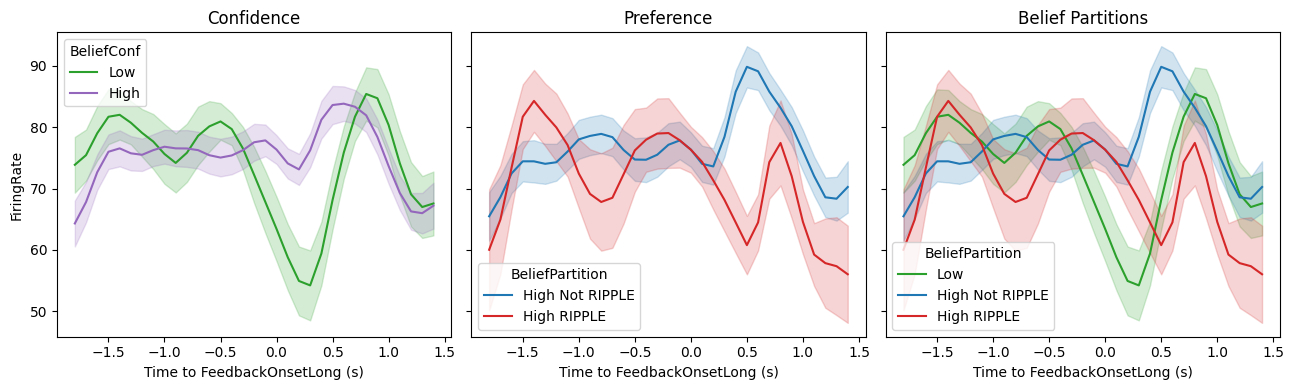

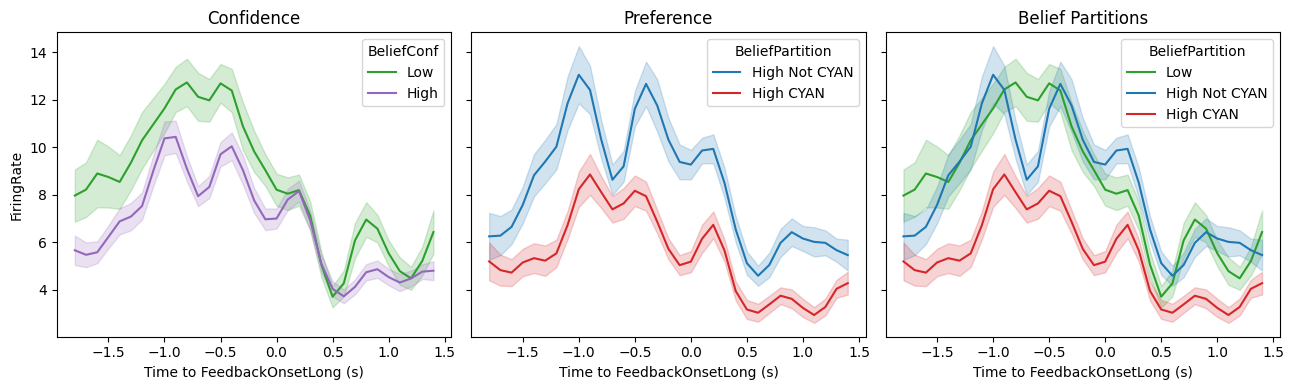

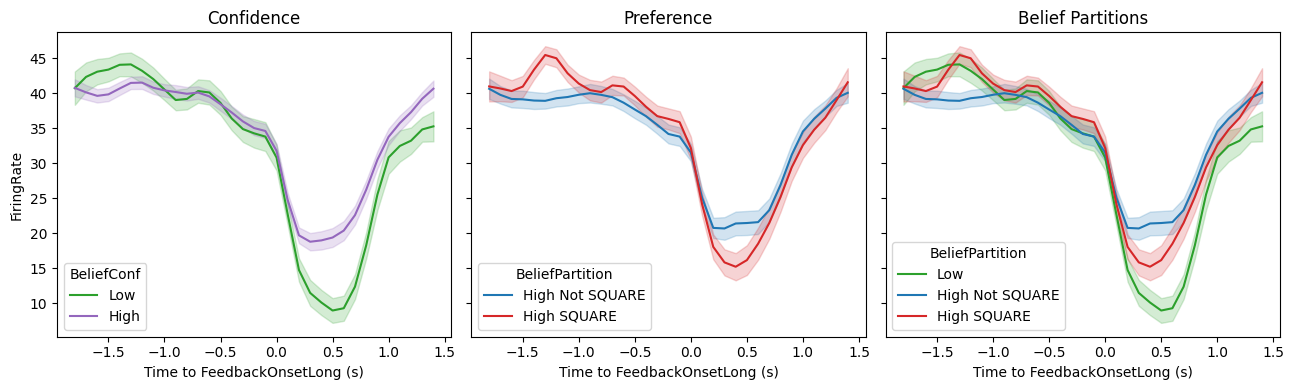

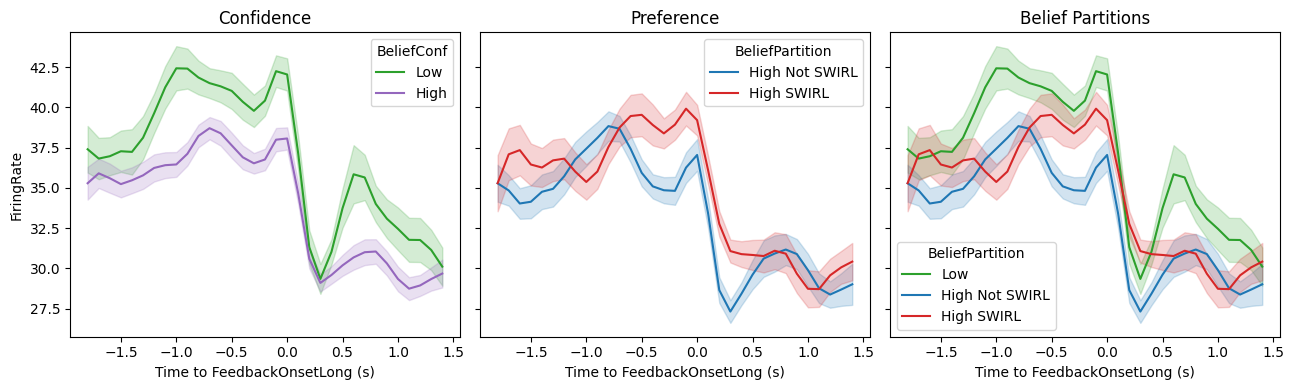

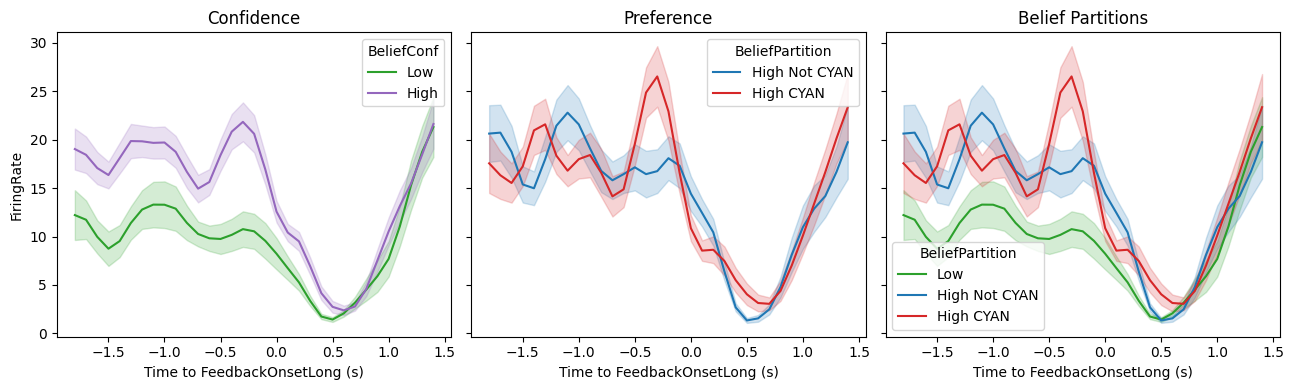

In [10]:
res = res.sort_values(by="x_BeliefPartition_comb_time_fracvar_x", ascending=False)
for i, unit_res in res[:10].iterrows():
    visualization_utils.plot_belief_partition_psth(unit_res.PseudoUnitID, unit_res.feat, args)